<a href="https://colab.research.google.com/github/Sepideh-Tabrik/Heartbeat_GitHub/blob/main/Heartbeat_Step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries quietly
# !pip install tensorflow -q
# !pip install keras -q
# !pip install scikit-learn -q
# !pip install pandas -q
# !pip install numpy -q
# !pip install matplotlib -q

# Verify installation and import libraries
import tensorflow as tf
import keras
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Mount Google Drive in Colab if I want to upload the dataset from Google Drive:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Heartbeat_Project

# remove the sample_data directory and all of its contents
!rm -rf /content/sample_data

In [ ]:
MIT_train = pd.read_csv('mitbih_train.csv')
MIT_test = pd.read_csv('mitbih_test.csv')

PTB_normal = pd.read_csv('ptbdb_normal.csv')
PTB_abnormal = pd.read_csv('ptbdb_abnormal.csv')

In [ ]:
new_column_names = [str(i) for i in range(188)]
MIT_train.columns = new_column_names
MIT_test.columns = new_column_names
PTB_normal.columns = new_column_names
PTB_abnormal.columns = new_column_names

In [ ]:
PTB_normal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage_MIT_Train = MIT_train.isnull().mean().mean() * 100
missing_percentage_MIT_Test = MIT_train.isnull().mean().mean() * 100
missing_percentage_PTB_Normal = MIT_train.isnull().mean().mean() * 100
missing_percentage_PTB_Abnormal = MIT_train.isnull().mean().mean() * 100

# Print the percentage of missing values
print('missing_percentage of MIT train dataset', missing_percentage_MIT_Train)
print('missing_percentage of MIT test dataset', missing_percentage_MIT_Test)
print('missing_percentage of PTB Normal dataset', missing_percentage_PTB_Normal)
print('missing_percentage of PTB Abnormal dataset', missing_percentage_PTB_Abnormal)

missing_percentage of MIT train dataset 0.0
missing_percentage of MIT test dataset 0.0
missing_percentage of PTB Normal dataset 0.0
missing_percentage of PTB Abnormal dataset 0.0


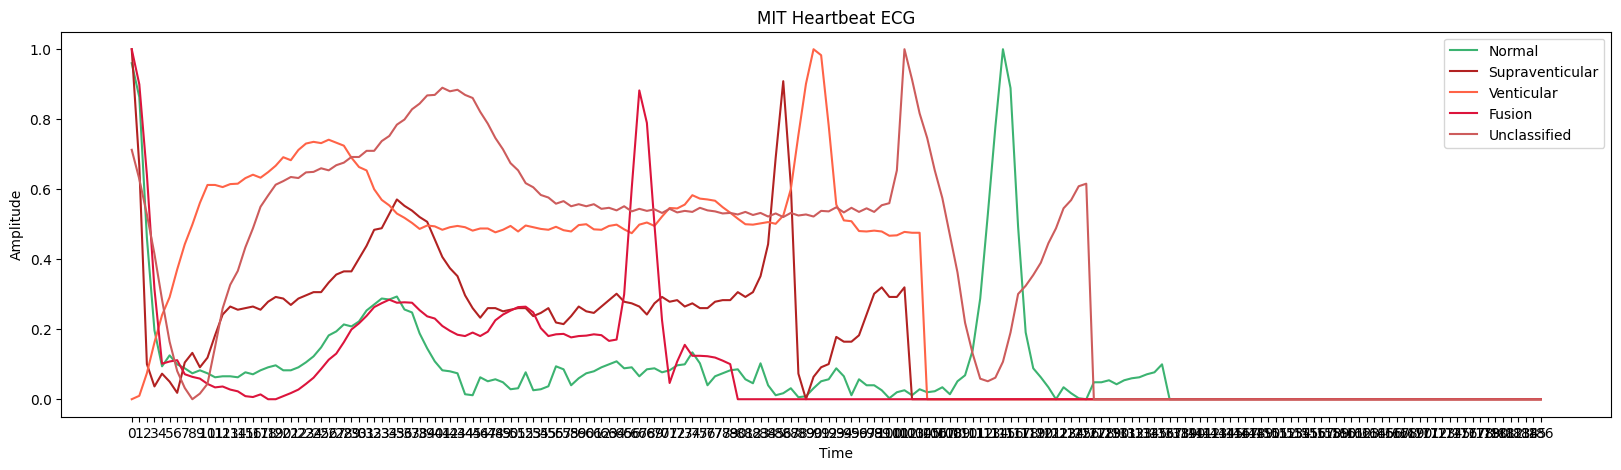

In [ ]:
# Plot the 5 different types of MIT train heartbeat signal
plt.figure(figsize=(20,5))

plt.plot(MIT_train.iloc[0, :-1],'MediumSeaGreen', label= 'Normal')
plt.plot(MIT_train.iloc[72470, :-1], 'firebrick', label='Supraventicular')
plt.plot(MIT_train.iloc[74693, :-1], 'tomato' , label='Venticular')
plt.plot(MIT_train.iloc[80481, :-1], 'crimson' , label='Fusion')
plt.plot(MIT_train.iloc[81122, :-1],'indianred', label='Unclassified')

plt.title('MIT Heartbeat ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


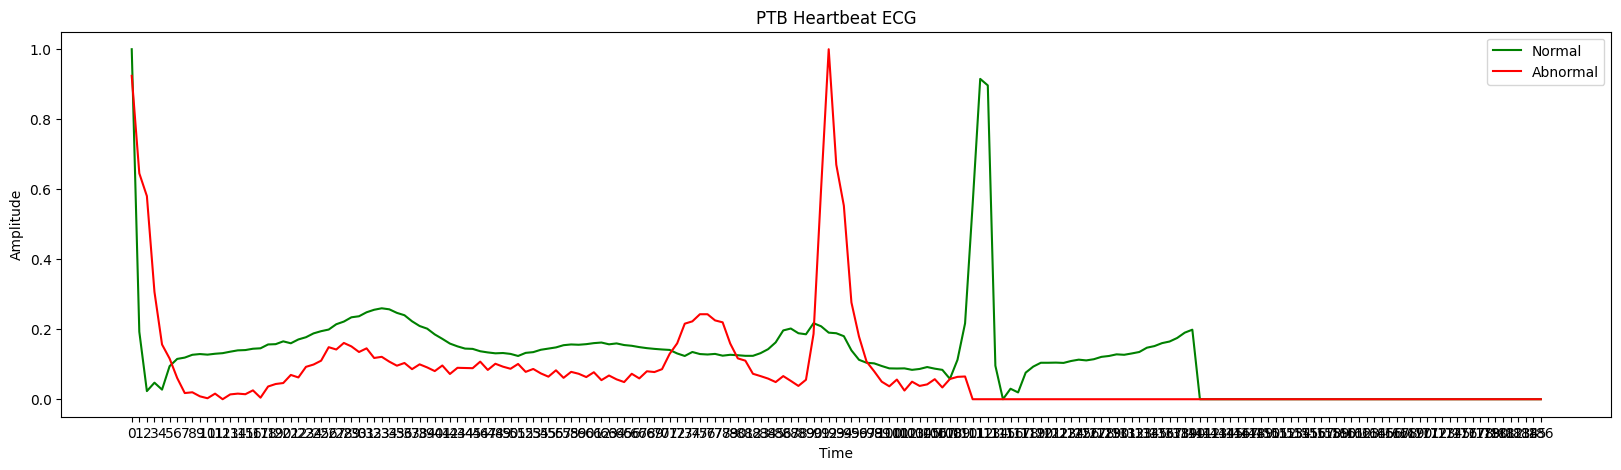

In [ ]:
# Plot the 5 different types of normal and abnormal PTB heartbeat signal
plt.figure(figsize=(20,5))

plt.plot(PTB_normal.iloc[10, :-1],'green', label= 'Normal')
plt.plot(PTB_abnormal.iloc[10, :-1], 'red', label='Abnormal')

plt.title('PTB Heartbeat ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Commentary: This plot shows the electrical activity of a normal heartbeat.
# The x-axis represents time, and the y-axis represents the amplitude of the ECG signal.
#The shape of the waveform provides insights into the heart’s condition.

# Validation: To validate the normality of this heartbeat, you could compare it
# with the average normal heartbeat signal or use statistical tests to compare
# the distributions of different classes.

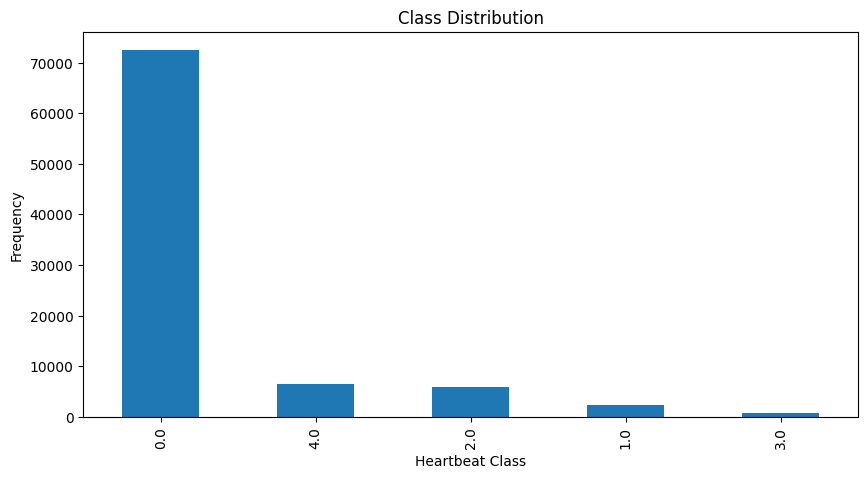

In [ ]:
# Class Distribution Bar Chart:
class_distribution = MIT_train['187'].value_counts()

plt.figure(figsize=(10,5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Heartbeat Class')
plt.ylabel('Frequency')
plt.show()
# Commentary: This bar chart shows the distribution of different heartbeat classes.
# It’s important for understanding the class imbalance in the dataset.

# Validation: You can validate the class imbalance by calculating the proportion
# of each class and comparing it with the expected distribution.